## MCMCの練習

二項分布でMCMCのサンプリングの練習をしてみる。  
MCMCを使って二項分布の確率pを求める。  
二項分布B(n,p)のnは定数とした。

### サンプルデータの作成(二項分布)

In [1]:
import numpy as np
import pandas as pd

<AxesSubplot:ylabel='Frequency'>

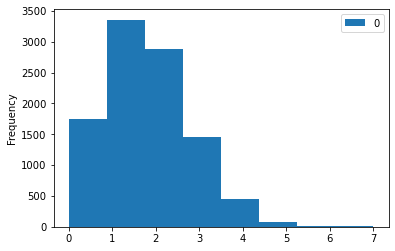

In [2]:
np.random.seed(0)

n= 8
data = np.random.binomial(n, 0.2, size=10000)
pd.DataFrame(data).plot.hist(bins=8)

### 尤度を計算する関数の作成

In [3]:
from scipy.stats import binom

In [4]:
def bio(y,n,p):
    return binom.pmf(y, n, p)

In [5]:
def LH_bio(y,n,p):
    return bio(y, n, p).sum()

### 二項分布内の確率pごとの尤度で辞書を作成  
後のforループを高速にするため

In [6]:
keys = [xi for xi in range(100)]
values = [LH_bio(data,n,p*0.01) for p in keys]
LH_dict = dict(zip(keys,values))

<AxesSubplot:>

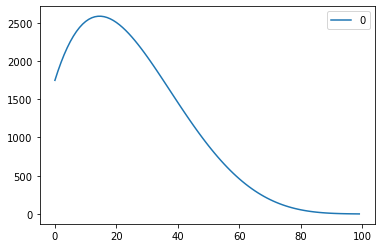

In [7]:
df0 = pd.DataFrame([LH_dict]).T
df0.plot.line()

### MCMCの1ステップ分の関数の作成

In [8]:
def step(y,n,p):
    # 変更前の尤度を計算
    LH0 = LH_dict[round(p*100)]

    # 変更後の位置を決定
    if np.random.rand()<0.5:
        p1 = p+0.01
    else:
        p1 = p-0.01
        
    # 変更後の尤度を計算
    if p1<0 or 1<p1:
        LH1 = 0
    else:
        LH1 = LH_dict[round(p1*100)]

    # 変更後へ遷移するかを計算
    if np.random.rand()*LH0<LH1:
        return p1
    else:
        return p

### ループさせてサンプリング

In [9]:
import tqdm

In [10]:
p = 0.2 # 2高分布の確率の初期値
samplings = []
for i in tqdm.tqdm(range(1_000_000)):
    p = step(data,n,p)
    samplings.append(p)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:03<00:00, 331540.53it/s]


### サンプリングの遷移とヒストグラムを作成

In [11]:
import seaborn as sns

In [12]:
df = pd.DataFrame(samplings,columns=["1"])

サンプリングの遷移

<AxesSubplot:>

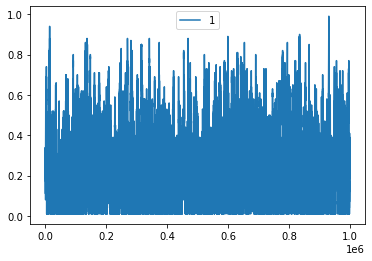

In [13]:
df.plot.line()

サンプリングのヒストグラム

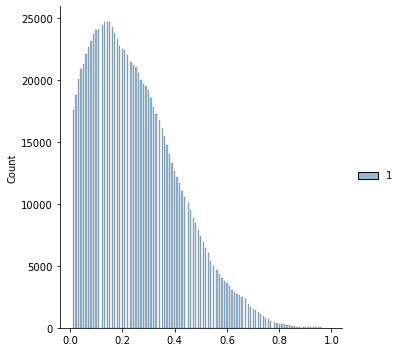

In [14]:
sns.displot(df)

正解値の0.2付近でヒストグラムが最大に近い。
このヒストグラムが確率pごとの尤度で辞書を作成した際の分布と形状が告示しているのは、詳細釣り合いの条件を満たしているからだと思われる。